---
## Algorithmes de classification multiclasse
---

<center><img src="./img/mlprocess_3.png" alt="Processus d'apprentissage automatique" width="50%"/></center>

Dans cet exemple, nous allons étendre les algorithmes vus dans le module précédent au problème multiclasse. En effet, il n'était possible que de choisir entre deux classes dans la définition précédente du problème, mais que faire lorsqu'on a 3 classes ou plus parmi lesquelles discriminer ? 

Essayons de regarder les données de plusieurs types d'Iris (les fleurs):

<img src="https://cdn-images-1.medium.com/max/1600/1*2uGt_aWJoBjqF2qTzRc2JQ.jpeg" width="500"/>


Définissons un ensemble de fonctions qui vont nous aider à visualiser plus aisément les résultats des différents classificateurs.

In [1]:
%matplotlib inline

# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# Traduit et décomposé par Camille Besse
# License: BSD 3 clause
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF, Matern, RationalQuadratic, ExpSineSquared, DotProduct, ConstantKernel
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

fg = (24,8)
cm_points = ListedColormap(['#FF0000','#FFFFFF', '#00FF00','#000000', '#0000FF'])
cm = 'jet_r'
params = {'figure.titlesize': 'xx-large',
          'font.size': '12',
          'text.color': 'k',
          'figure.figsize': fg,
         }
pylab.rcParams.update(params)



Automatically created module for IPython interactive environment


In [2]:
def creationMesh(X):
    """
    Crée une grille sur un espace bidimensionnel. Prends le min et le max de chaque dimension et 
    génère la grille avec une résolution de 0.02. 
    
    X: un vecteur à deux colonnes de données. 
    """
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx,yy


def plotClassifierOnData(name,clf,data,i=3,n=1,multi=False):
    """
    Pour afficher les résultats d'un classificateur sur un dataset
    name : le titre du graphique
    clf : le classificateur à utiliser
    data : les données à utiliser
    i : Le ième graphique sur n à afficher (pour afficher 3 graphiques par ligne)
    n : Le nombre total de graphiques à afficher
    multi: détermine si on affiche juste la frontière de décision (true) ou 
           le score/probabilité de chaque point de l'espace, car on ne peut afficher le score en multiclasse.
    """
    
    # Préparation rapide des données : 
    # Normalisation des données 
    X, y = data
    X = StandardScaler().fit_transform(X)
    # Séparation des données en TRAIN - TEST
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=rng_seed)
    # Pour la visualisation des régions et calcul des bornes 
    xx,yy = creationMesh(X)

    # Création du bon nombre de figures à afficher (3 par lignes)
    ax = plt.subplot(n/3,3,i)
    
    # Entraînement du classificateur et calcul du score final (accuracy)
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)

    # Pour afficher les frontières de décision, on va choisir une couleur pour 
    # chacun des points x,y du mesh [x_min, x_max]x[y_min, y_max].

    # Si on est en multiclasse (2 ou +), on affiche juste les frontières
    if multi:
         Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    else:# sinon on peut afficher le gradient du score
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

    # On affiche le mesh de décision
    Z = Z.reshape(xx.shape)
    test = ax.contourf(xx, yy, Z, 100, cmap=cm, alpha=.8)

    # On affiche la légende
    cbar = plt.colorbar(test)
    cbar.ax.set_title('score')
    
    # On affiche les points d'entraînement
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_points,
               edgecolors='k',s=100)
    # Et les points de test
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_points, 
               edgecolors='k',marker='X',s=100)

    # On définit les limites des axes et autres gogosses
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    
    ax.set_title(name,fontsize=22)
    # Dont le score en bas à droite
    ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
            size=15, horizontalalignment='right')


def plotClassifier(name, clf, datasets):
    """
    Affiche pour un classificateur donné, son résultat sur l'ensemble des datasets préalablement déterminés
    name : le nom du classificateur à afficher (titre du graphique)
    clf : un classificateur de Scikit-Learn
    datasets : une liste de datasets
    """
    f = plt.figure(figsize=fg)
    # Pour chacun des dataSets
    for ds_cnt, ds in enumerate(datasets):
        plotClassifierOnData(name, clf, ds,ds_cnt+1,3)

    plt.tight_layout()
    plt.show()


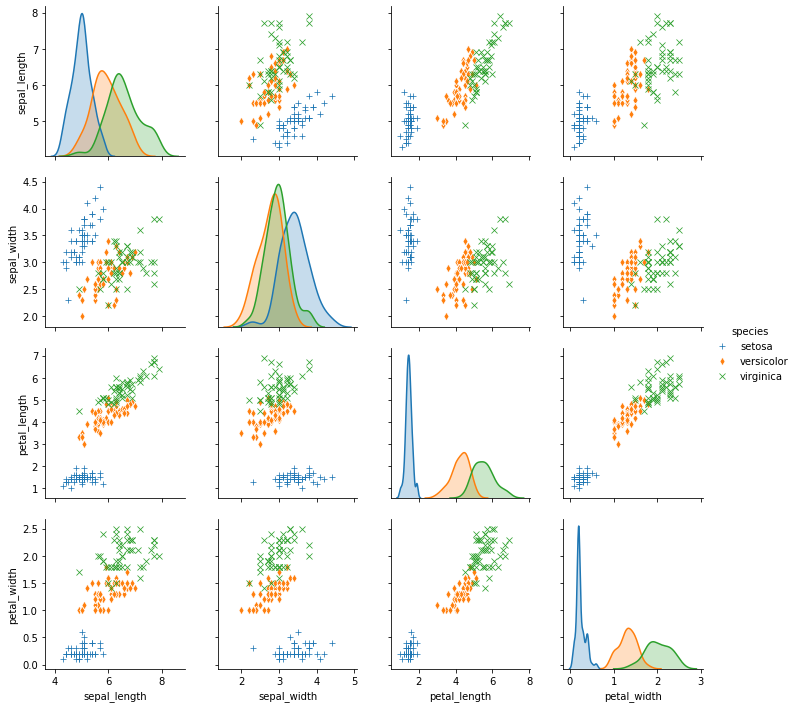

,sepal_length,sepal_width,petal_length,petal_width,species
49,5.0,3.3,1.4,0.2,setosa
78,6.0,2.9,4.5,1.5,versicolor
28,5.2,3.4,1.4,0.2,setosa
79,5.7,2.6,3.5,1.0,versicolor
119,6.0,2.2,5.0,1.5,virginica
131,7.9,3.8,6.4,2.0,virginica
112,6.8,3.0,5.5,2.1,virginica
83,6.0,2.7,5.1,1.6,versicolor
60,5.0,2.0,3.5,1.0,versicolor
53,5.5,2.3,4.0,1.3,versicolor


In [3]:
import pandas as pd
import seaborn as sns


import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import metrics
from sklearn.multiclass import OneVsRestClassifier,OneVsOneClassifier
from sklearn.preprocessing import StandardScaler,LabelEncoder


from sklearn.model_selection import train_test_split

## Pour le générateur de nombres pseudo-aléatoires et la reproductibilité des résultats
rng_seed = 0 

## Définition du noyau RBF
noyauRBF = 1.0 * RBF(length_scale=1.0, length_scale_bounds=(1e-1, 10.0))

iris = sns.load_dataset("iris")

g = sns.pairplot(iris, hue='species', markers=['+','d','x'])
plt.show()
iris.sample(10)

### Rappel : Séparer les données en deux : entraînement et test
#### Avantages

   - En séparant les données aléatoirement on ne teste pas sur les mêmes données que celles entraînées.
   - Cela garantit que nous n'utiliserons pas les mêmes observations dans les deux ensembles. 
   - Cela généralise mieux les données plus rapidement.

#### Inconvénients
   - Le score d'exactitude sur l'ensemble de test varie en fonction des données qui y ont été sélectionnées.
   - On peut mitiger ça en utilisant la validation croisée.

#### Notes
   - Le score d'exactitude  des modèles dépend des observations de l'ensemble de test, qui est déterminé par l'initialisation du générateur pseudo-aléatoire.
   - Plus la complexité du modèle augmente, plus l'exactitude d'entraînement augmente.
   - Si un modèle est trop complexe (overfitting) ou pas assez complexe (underfitting), l'exactitude d'entraînement est trop basse. 


In [4]:
X = iris.drop('species', axis=1)
y = iris['species']

# Vous pouvez afficher les informations du dataset
# print(X.head())
# print(X.shape)
# print(y.head())
# print(y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=rng_seed)

Une fois les données séparées, on peut déterminer quelle serait la meilleure valeur de $k$ dans un $k$-NN sur l'ensemble des données d'entraînement.

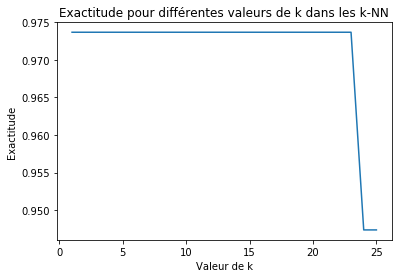

In [5]:
# Expérimentons avec différentes valeurs de k.
k_range = list(range(1,26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
    
plt.plot(k_range, scores)
plt.xlabel('Valeur de k')
plt.ylabel('Exactitude')
plt.title('Exactitude pour différentes valeurs de k dans les k-NN')
plt.show()

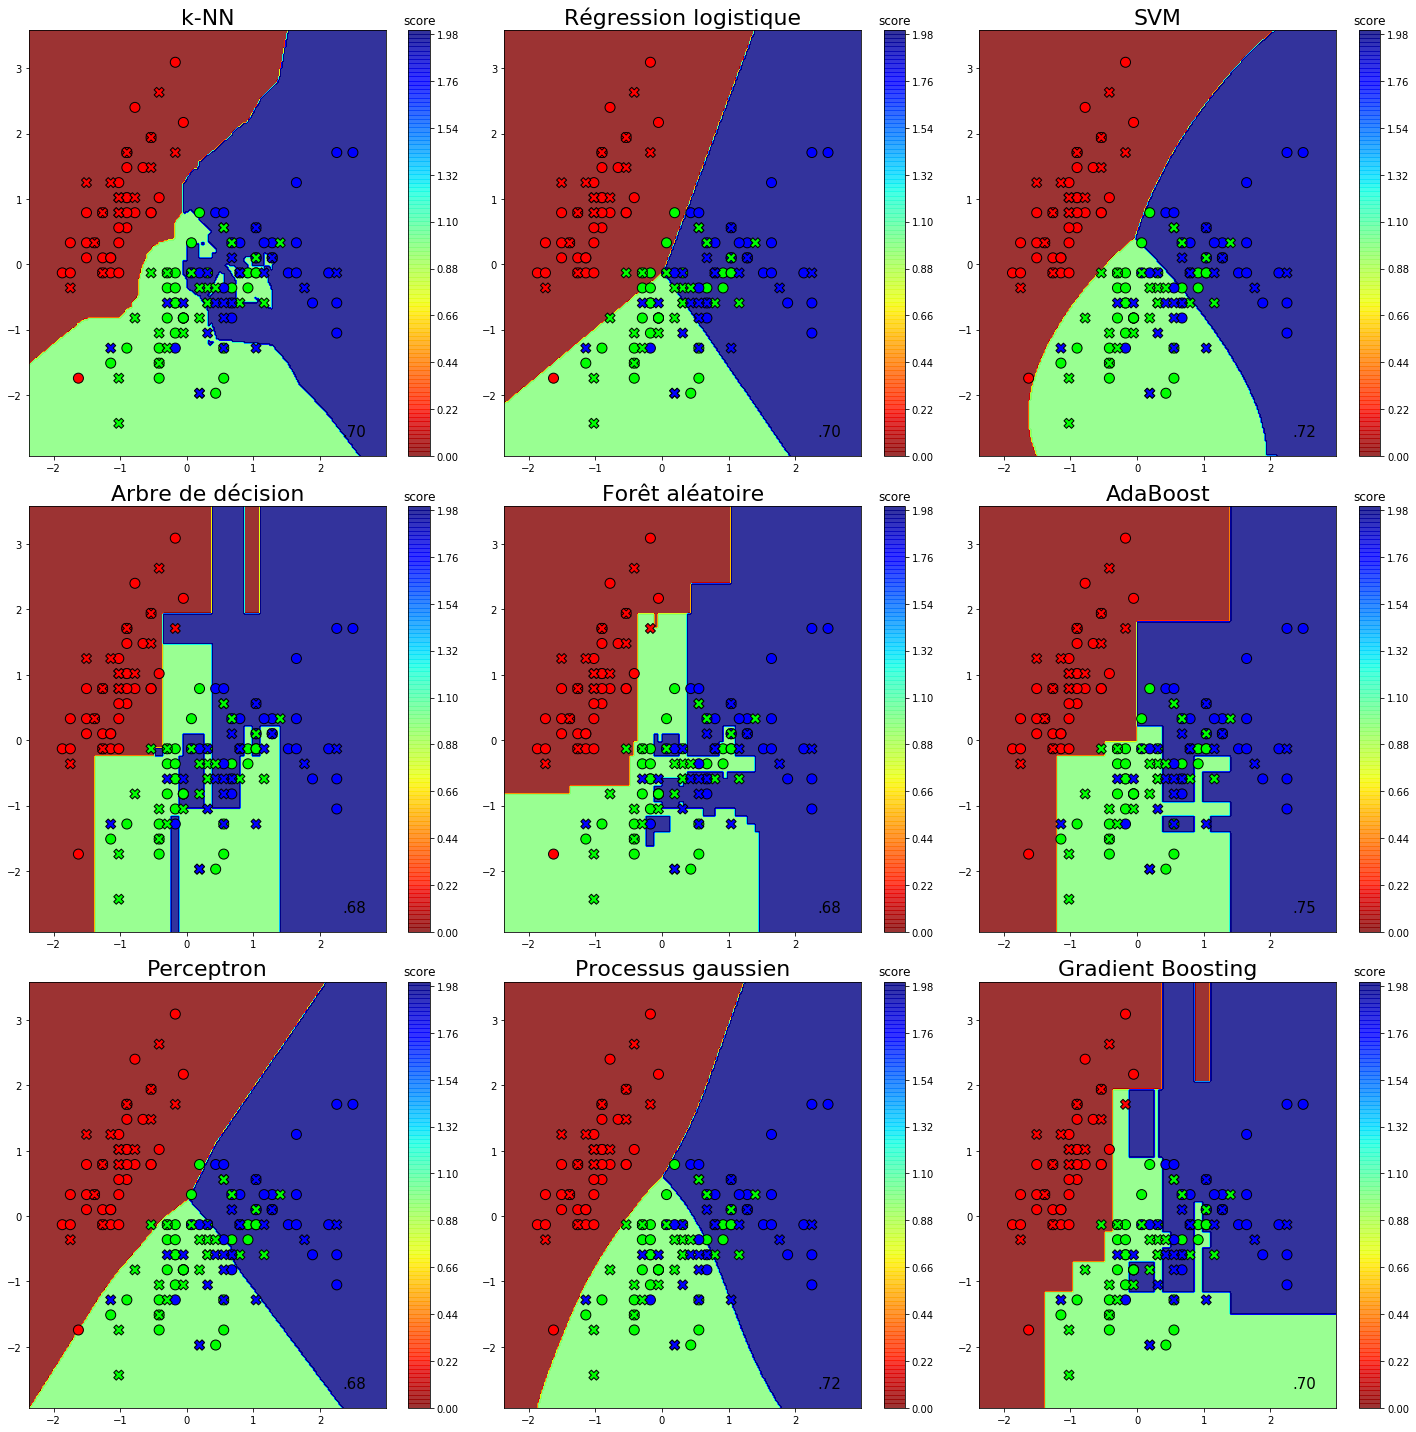

In [7]:
#Choisir les caractéristiques en entrée: 
c0 = 'sepal_length'
c1 = 'sepal_width'
c2 = 'petal_length'
c3 = 'petal_width'

f1 = c0
f2 = c1
#  ----------------------

# Paramétrer les classificateurs
clfs = [
    KNeighborsClassifier(n_neighbors=3, weights='uniform', leaf_size=30),
    LogisticRegression(random_state=rng_seed,max_iter=1000,penalty='l2',C=0.01,solver='liblinear'),
    SVC(kernel='rbf', C=1,gamma=.2,max_iter=1000),
    DecisionTreeClassifier(max_depth=6, random_state=rng_seed),
    RandomForestClassifier(max_depth=6, n_estimators=15, max_features=2, random_state=rng_seed),
    AdaBoostClassifier(n_estimators=15, learning_rate=0.5,random_state=rng_seed),
    MLPClassifier(hidden_layer_sizes=(5,), activation='relu', alpha=0.01, max_iter=10000, random_state=rng_seed),
    GaussianProcessClassifier(kernel=noyauRBF),
    GradientBoostingClassifier(n_estimators=15, learning_rate=0.5, subsample=1, max_depth=2, random_state=rng_seed),
]
# Liste des noms associés
clf_names = [
    'k-NN','Régression logistique','SVM',
    'Arbre de décision','Forêt aléatoire','AdaBoost',
    'Perceptron','Processus gaussien','Gradient Boosting'   
]

#  ----------------------

# Création du dataset 
X = iris[[f1,f2]].values

## Encodage des espèces en valeurs numériques pour la coloration
le = LabelEncoder()
le.fit(iris.species.unique())
y = le.transform(iris.species)
data_iris = [X,y]
#  ----------------------

# Affichage des frontières de décision pour les 9 classificateurs.
f = plt.figure(figsize= (20,20))

# Pour chacun des classificateurs
for cnt, clf in enumerate(clfs):
    plotClassifierOnData(clf_names[cnt], OneVsRestClassifier(clf), data_iris,cnt+1,len(clfs),True)


plt.tight_layout()
plt.show()

Voyons les matrices de confusion pour ces classificateurs : 

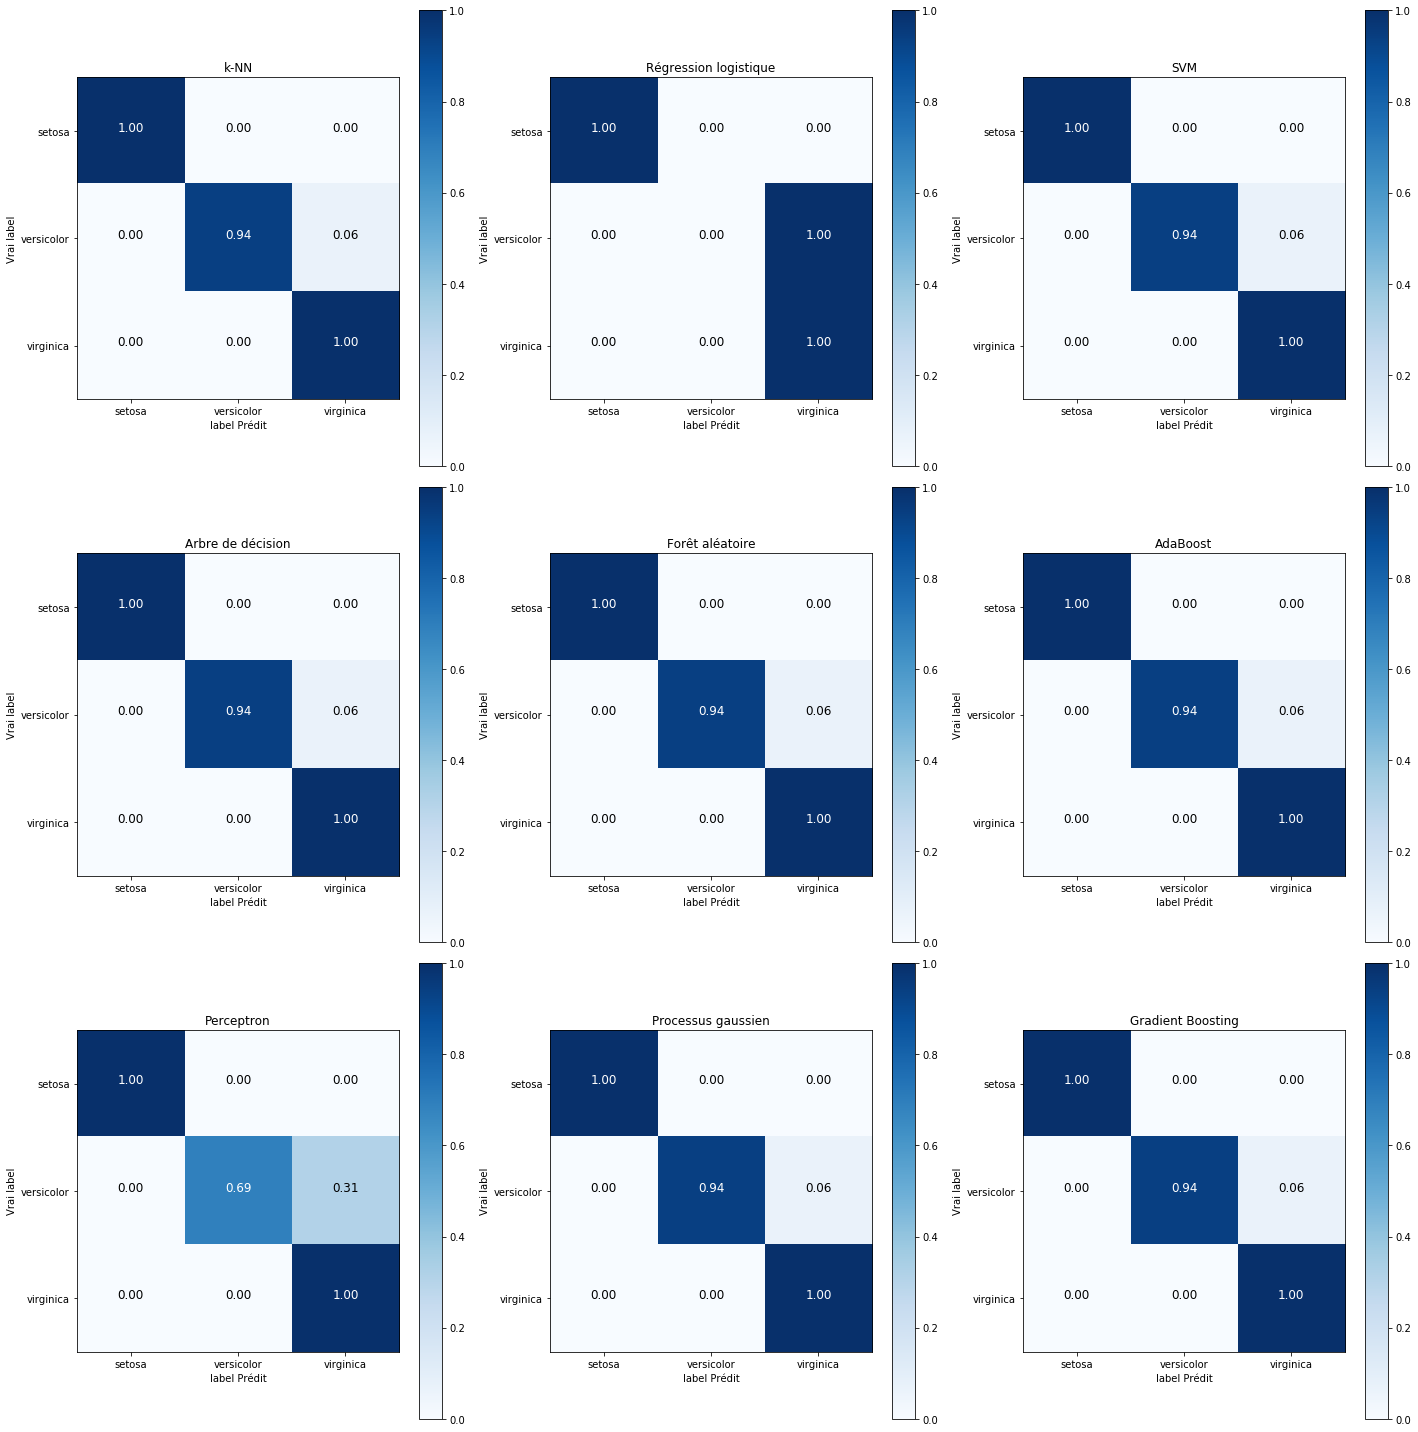

In [8]:
import itertools
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

def plot_confusion_matrix(clf,classes,                       
                          title,i,n,X_train,y_train,
                          cmap=plt.cm.Blues):
    """
    Cette fonction calcule et affiche la matrice de confusion pour un classificateur donné.
    clf : classificateur
    classes : les classes à déterminer dans le dataset.
    title : 
    """
    y_pred = clf.fit(X_train, y_train).predict(X_test)

    # Calcul de la matrice de confusion
    cnf_matrix = confusion_matrix(y_test, y_pred)
    np.set_printoptions(precision=2)

    cnf_matrix  = cnf_matrix .astype('float') / cnf_matrix.sum(axis=1)[:, np.newaxis]

    ax = plt.subplot(n/3,3,i)
    test = ax.imshow(cnf_matrix, interpolation='nearest', cmap=cmap)
    ax.set_title(title)
    cbar = plt.colorbar(test)

    tick_marks = np.arange(len(classes))
    ax.set_xticks(tick_marks)
    ax.set_xticklabels(classes)
    ax.set_yticks(tick_marks)
    ax.set_yticklabels(classes)

    thresh = cnf_matrix.max() / 2.
    for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
        plt.text(j, i, format(cnf_matrix[i, j], '.2f'),
                 horizontalalignment="center",
                 color="white" if cnf_matrix[i, j] > thresh else "black",size=12)

    
    ax.set_ylabel('Vrai label')
    ax.set_xlabel('label Prédit')


# Affichage des matrices de confusion pour les 9 classificateurs.
f = plt.figure(figsize= (20,20))

# Pour chacun des classificateurs
for cnt, clf in enumerate(clfs):
    plot_confusion_matrix(OneVsRestClassifier(clf), iris.species.unique(), clf_names[cnt],cnt+1,len(clfs),X_train,y_train)

plt.tight_layout()
plt.show()

___
# Multiclasse : À vous de jouer ! 
___

Dans cet exercice, vous avez maintenant les moyens de choisir le bon classificateur et ses hyperparamètres en utilisant toutes les connaissances de la journée.

Nous allons charger un dataset contenant 4 types de fruits: pommes, oranges, mandarines et citrons. À vous maintenant de déterminer à partir de leur masse, hauteur, largeur, couleur, quels sont les types de fruits.

Un exemple de code vous est fourni pour visualiser les données, mais rappelez-vous qu'il est plus intéressant d'utiliser l'ensemble des données plutôt que deux colonnes à la fois !


In [9]:
# Importation du fichier de données
import wget

!rm './fruits.csv'
wget.download('https://raw.githubusercontent.com/iid-ulaval/EEAA-datasets/master/fruits.csv','./fruits.csv')

'rm' n'est pas reconnu en tant que commande interne
ou externe, un programme ex‚cutable ou un fichier de commandes.


100% [................................................................................] 2310 / 2310

'./fruits.csv'

In [10]:
# Éliminons la colonne "subtype" qui pourra faire l'objet d'exercices supplémentaires
fruits = pd.read_csv('fruits.csv', sep=',').drop('fruit_subtype',axis=1)

Jetons un œil aux données:

Tout d'abord les 10 premiers éléments.

In [11]:
fruits.sample(10)

,fruit_label,fruit_name,mass,width,height,color_score
48,4,lemon,174,7.3,10.1,0.72
49,4,lemon,132,5.8,8.7,0.73
18,1,apple,162,7.5,7.1,0.83
45,4,lemon,186,7.2,9.2,0.72
9,1,apple,172,7.4,7.0,0.89
55,4,lemon,116,6.3,7.7,0.72
40,3,orange,154,7.1,7.5,0.78
6,2,mandarin,80,5.9,4.3,0.81
14,1,apple,152,7.6,7.3,0.69
24,3,orange,342,9.0,9.4,0.75


Puis, étudions les relations qui existent entre chaque paire de caractéristiques.

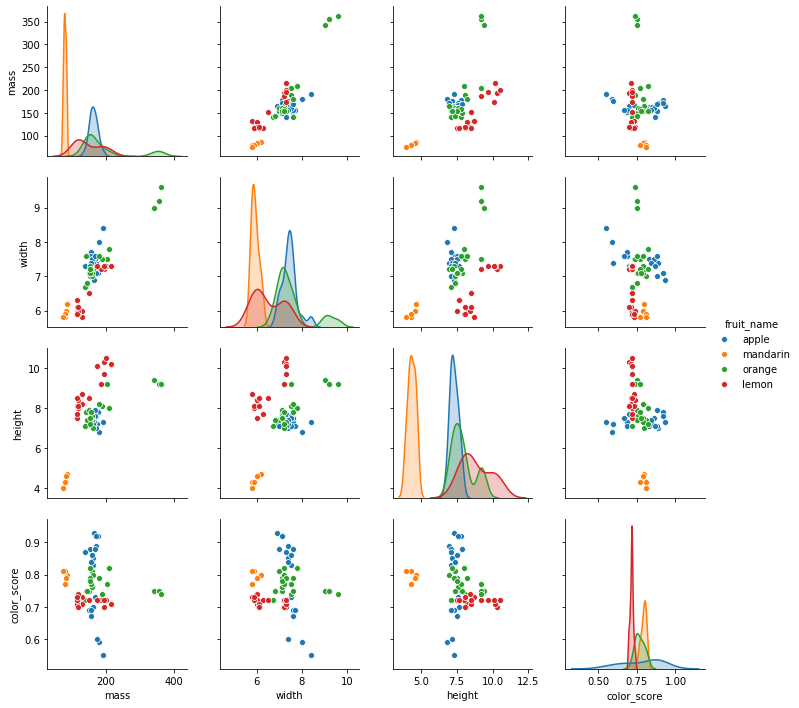

In [12]:
g = sns.pairplot(fruits.drop('fruit_label',axis=1), hue='fruit_name')
plt.show()

**Exercice : ** Le code suivant montre l’apprentissage et la visualisation des résultats avec 2 caractéristiques seulement. L’objectif étant bien sûr de trouver la meilleure combinaison algorithme/hyperparamètres pour l’ensemble des caractéristiques. À vous d’adapter le code suivant :

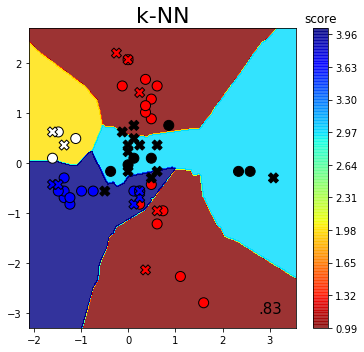

In [13]:
# Choisir les caractéristiques en entrée: 
c0 = 'mass'
c1 = 'width'
c2 = 'height'
c3 = 'color_score'

#  ----------------------

# Création du dataset 
X = fruits[[c1,c3]].values
y = fruits['fruit_label']
data = [X,y]
#  ----------------------

# Choix du classificateur

choix = 0

# Choix des hyperparamètres (grid search ? cross-validation ?)
clfs = [
    KNeighborsClassifier(n_neighbors=3, weights='uniform', leaf_size=30),
    LogisticRegression(random_state=rng_seed,max_iter=1000,penalty='l2',C=0.01,solver='liblinear'),
    SVC(kernel='rbf', C=1,gamma=.2,max_iter=1000),
    DecisionTreeClassifier(max_depth=6, random_state=rng_seed),
    RandomForestClassifier(max_depth=6, n_estimators=15, max_features=2, random_state=rng_seed),
    AdaBoostClassifier(n_estimators=100, learning_rate=0.3,random_state=rng_seed),
    MLPClassifier(hidden_layer_sizes=(5,), activation='relu', alpha=0.01, max_iter=1000, random_state=rng_seed),
    GaussianProcessClassifier(kernel=noyauRBF),
    GradientBoostingClassifier(n_estimators=15, learning_rate=0.5, subsample=1, max_depth=2, random_state=rng_seed),
]

clf_names = [
    'k-NN','Régression logistique','SVM',
    'Arbre de décision','Forêt aléatoire','AdaBoost',
    'Perceptron','Processus gaussien','Gradient Boosting'   
]


# Affichage des frontières de décision pour le classificateur choisi (OvO ? OvR ?)
f = plt.figure(figsize= (15,5))
plotClassifierOnData(clf_names[choix], OneVsOneClassifier(clfs[choix]), data,1,3,True)
plt.tight_layout()
plt.show()